# Neighborhood Metrics Analysis

## Team Name
The Tired Duo

## Team Members
- Ilya Abbasian (ilya@email.com) Focused on the ranked metric section
- Raymond Zong (RHZ4@pitt.edu) Focused on the percentage metric section, and working alonside Ilya for writeup the final-project.ipy

## Description and Datasets (Introduction section)
This project analyzes neighborhood-level metrics by combining multiple datasets. It focuses on evaluating land acreage, total deaths, employment statistics, and K-12 school enrollment to identify trends or patterns across neighborhoods.


The idea of this metric was that it gives a surface level idea of "most prosperous neighborhood". Obviously, there are many factors in regards to why certain neighborhoods have the stats that they do, but for the sake of argument (and saving time), we came at this with a more face value approach. We did consider things such as crime statistics, air quality, and water quality levels, however, finding a point/metric system for all of these combined proved difficult. Things such as air quality can be difficult to make a metric as Pittsburgh is a city where all the air is connected together(duh). The size of a city is simply not big enough to see the differences of air quality neighborhood to neighborhood, especially when many are neighboring each other.


### **Datasets Used**
1. `land.csv` - Contains neighborhood acreage data.
2. `medianagedeath.csv` - Reports total deaths by neighborhood.
3. `employment.csv` - Includes employment estimates by neighborhood.
4. `school_enrollment.csv` - Contains K-12 student enrollment data.

   ### **Metric Methods**
There were two metrics we used. The first metric we used was a percentage point metric for the datasets on emplyoment and student population. How this would work was if a neighborhood had the highest employed population, it would receive 100 points. However, if there student population was only 30% compared to the neighborhood with the highest amount of students, the neighborhood would receieve only 30 points. Our group believed that the biggest factor in regards to being  "prosperous" neighborhood where the amount of people attending for their education or being employed, as that showed a strong indication the neighborhood was never stagnant in economic and educational growth.


The second metric we used was flat ranking point metric for the least amount of deaths in a neighborhood and the most amount of land in a neighborhood. How this would work is if the neighborhood had the least deaths, the neighborhood would receive 100 points. If a neighborhood was ranked in 30th out of 100 neighorhoods for highest amount of land, it would receieve 70 points.

We decided to do a flat ranking approach for these two datasets because unlike the percentage metric we used, we feel like it's not fair to judge based on percentage in regards to least amount of deaths and most land. This is due to the fact that the deaths never specify what was the cause of death. Obviously deaths in general are bad, but a death due to a violent crime and one from natural causes are both listed as the same in the dataset, which means the safety of a neighborhood can not be properly gauged with the percentage metric. However, the acre dataset was also put into the ranked system metric as we simply figured that while more land equals more opportunity for the land to be used, we don't know how much of that land is fully utlized, so once again, we use a flat ranking metric to avoid underscoring certain neighborhoods.

### **Repository Contents**
- **`final-project.ipynb`**: The main notebook consolidating all the data analysis and results.
In this final notebook we brought together all the cleaned and processed datasets like the land acreage, total deaths, employment levels, and K-12 school enrollment in order to evaluate neighborhoods comprehensively. By merging these datasets and assigning both ranks and percentage points we could easily identify trends and patterns across neighborhoods, whilst also taking out any biases that we may have.
The results highlight key insights: neighborhoods with smaller land sizes and high death counts may face challenges such as overcrowding or limited public resources. Similarly looking at employment and school enrollment data shows potential economic disparities, with some neighborhoods showing high student enrollment but low employment levels. Combining these metrics into a single way to rank the neighborhoods gives us a clear picture of neighborhood conditions and enables targeted recommendations for urban planning, public health improvements, and resource allocation.
- **`points_merged.ipynb`**: Intermediate processing of combined datasets.

In this notebook we combined the employment data and K-12 student enrollment data to calculate percentage points for each neighborhood. The employment and enrollment metrics were normalized as percentages relative to their respective maximum values, so that there would be fair comparison across neighborhoods. From the results we saw that neighborhoods with higher employment levels often showed a moderate to high student enrollment indicating a potential correlation between employment opportunities and family settlement patterns. However this was not true for all neighborhoods and some neighborhoods with high student enrollment did not show high employment points, suggesting that it may not be a direct correlation.
- **`ranked_merged.ipynb`**: Focused analysis for ranking neighborhoods.

In this notebook the land acreage and total deaths data were combined and analyzed by assigning ranks to neighborhoods. Acreage was ranked in ascending order meaning that the smaller areas got higher priority, while deaths were ranked in descending order so the higher deaths received higher ranks. This approach showed the neighborhoods with smaller land sizes but larger death counts, which could indicate population density or other factors influencing mortality rates. The results reveal that certain neighborhoods with smaller acreages also ranked high in death points this could point toward overcrowding or limited access to healthcare. On the other hand neighborhoods with larger acreages and fewer deaths may reflect better living conditions or lower population density. These rankings provide a useful starting point for deeper analysis into public health and urban planning.


- **Data Files**:
   - `land.csv`  
   - `medianagedeath.csv`  
   - `employment.csv`  
   - `school_enrollment.csv`  
- **Output Files**:
   - `ranked_points.csv` - Ranked neighborhoods based on acreage and deaths.
   - `percent_points.csv` - Percentage-based points for employment and K-12 enrollment.
   - `total_points.csv` - Final combined points for all metrics.
- **`maps.jpg`**: Visual asset for geographic reference.

## Overview
This repository integrates neighborhood-level data to rank and evaluate various metrics, such as:
- **Land Size** (acres)
- **Total Deaths** per neighborhood
- **Employment** levels
- **K-12 School Enrollment**

The analysis uses Python with **pandas** for data processing and outputs useful insights into neighborhood trends.


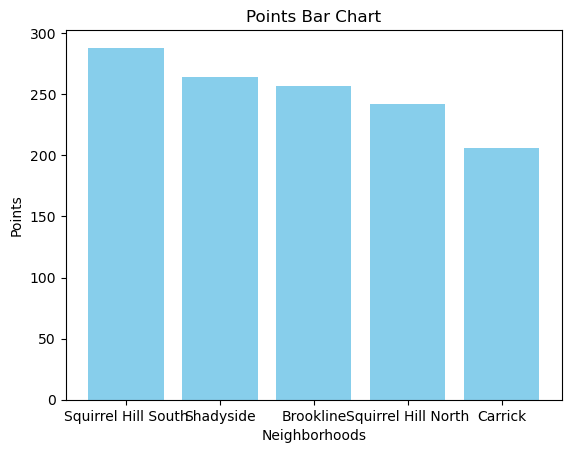

In [1]:
# CODE TO GET THE DATA TO SHOW OUR NARRATIVE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## GET RANKED DATASET
columns_to_load = ['Neighborhood', 'Acres Points', 'Death Points']
ranked_df = pd.read_csv("ranked_points.csv", usecols=columns_to_load)
ranked_df = ranked_df.sort_values(by='Neighborhood', ascending=True)
ranked_df['Neighborhood'] = ranked_df['Neighborhood'].str.replace('-', ' ')

## GET PERCENTAGE DATASET
columns_to_load = ['Neighborhood', 'Employed Residents Points', 'K-12 Students Points']
percent_df = pd.read_csv("percent_points.csv", usecols=columns_to_load)
percent_df = percent_df.sort_values(by='Neighborhood', ascending=True)
percent_df['Neighborhood'] = percent_df['Neighborhood'].str.replace('-', ' ')


df_merged = pd.merge(ranked_df, percent_df, on='Neighborhood', how='outer')

numeric_cols = df_merged.drop(columns=['Neighborhood']).columns  # Identify numeric columns
df_merged['Total Points'] = df_merged[numeric_cols].sum(axis=1)
df_merged = df_merged.sort_values(by='Total Points', ascending=False)
df_merged.to_csv('total_points.csv', index=False)


top_five_n = df_merged['Neighborhood'].head()
top_five_p = df_merged['Total Points'].head()

# Create a bar chart
plt.bar(top_five_n, top_five_p, color='skyblue')

# Add labels and title
plt.xlabel("Neighborhoods")
plt.ylabel("Points")
plt.title("Points Bar Chart")

# Display the plot
plt.show()

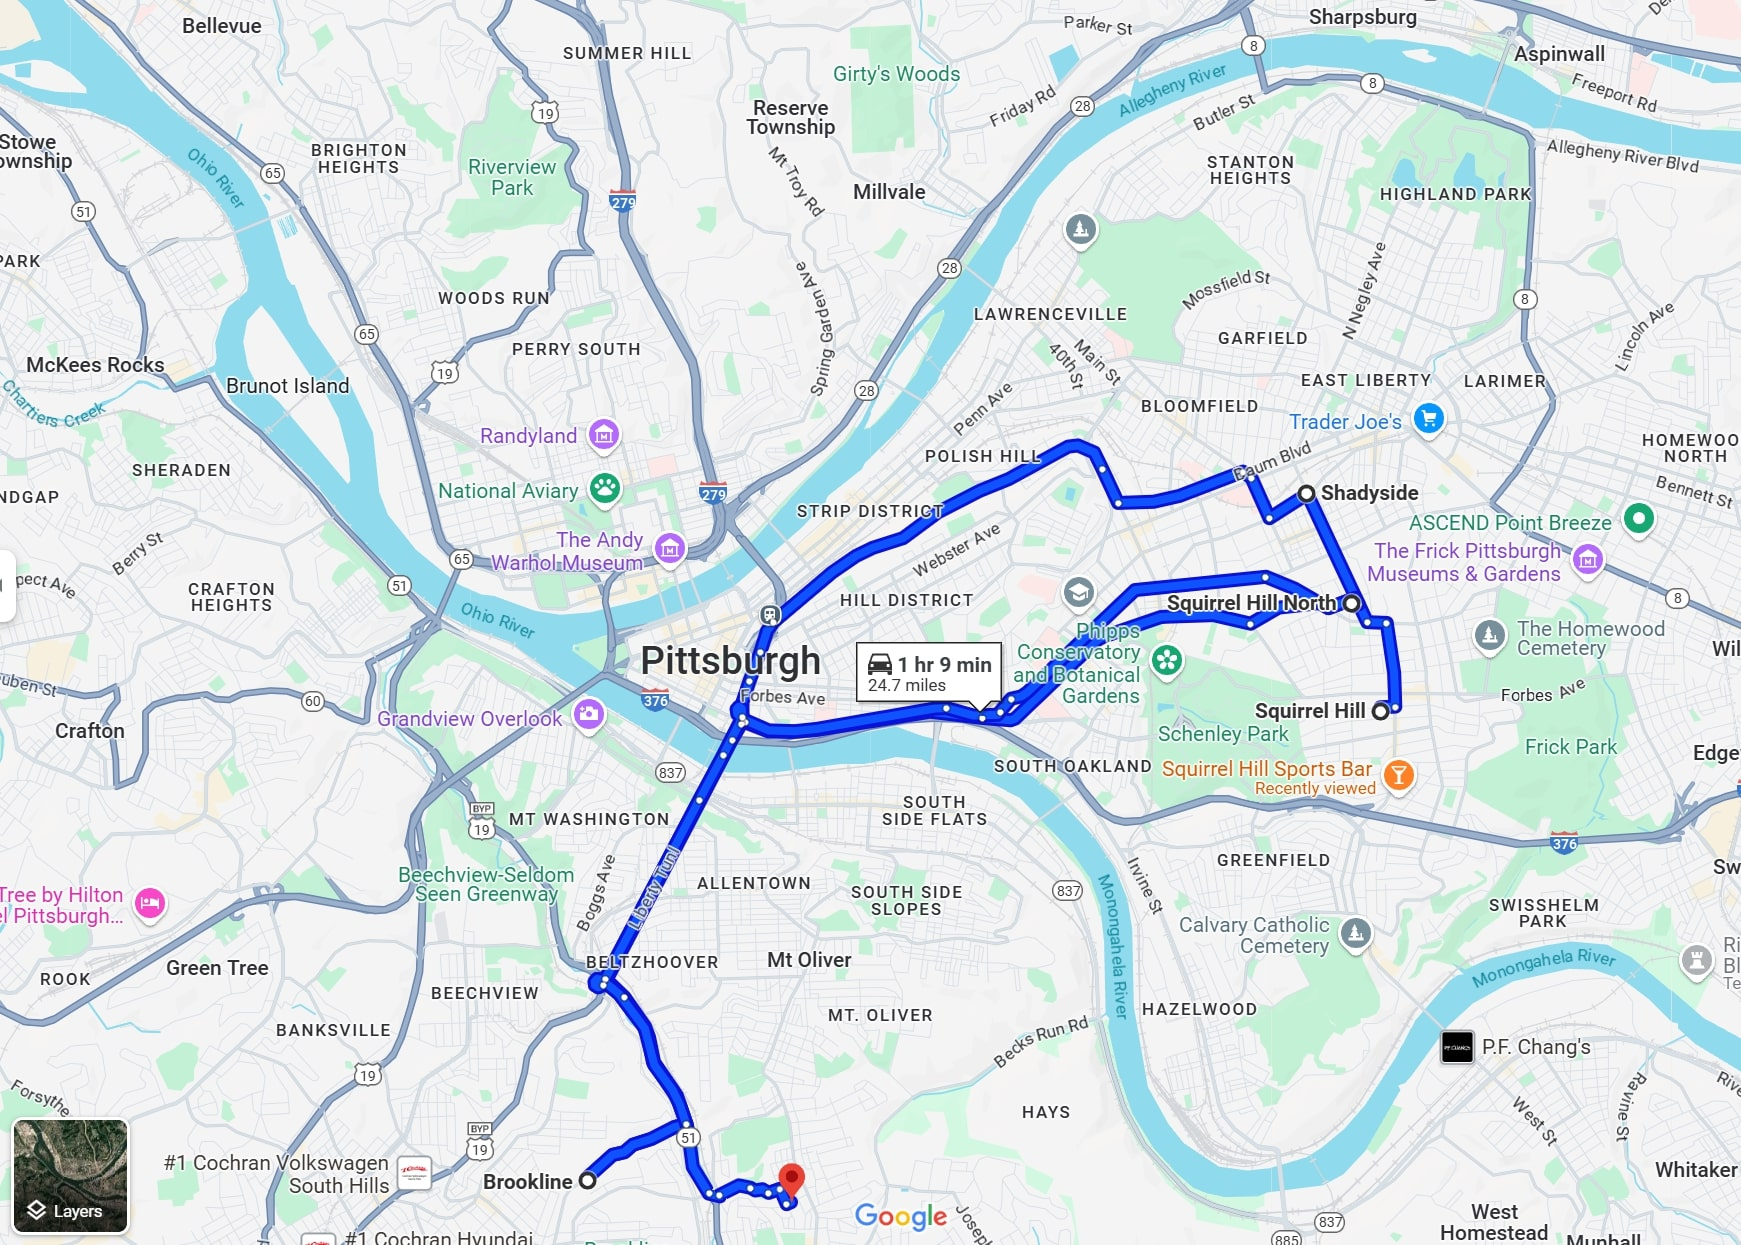

### **The Best Neighborhood**

It seems the best neighborhood in the city is Squirrel Hill South. When you look at the top 5, it seems that other neighborhoods that rank high in our metric our bundled in the same location. Our data shows that Squirrel Hill South is the neighborhood with the most deaths. However, we believe we can chalk that up to the absurd population. It receieved 97 points for employed population and a perfect 100 for student population. If you look at the geographical location, it seems to make sense why. All of the top 5 ranked neighborhoods with our metric are close to parks. It makes even more sense when you realize 1st, 2nd, and 4th place all are near the same parks. All of the top 5 are actually quite low in rankings regarding least deaths in their respective neighborhoods. So it seems that the actual biggest factor for the best neighborhood is indeed land, which we originally didn't anticipate. We think it goes to show that the land for most neighborhoods are utilized similarly to other neighborhoods and the difference in how much land each neighborhood has then determines the amount of houses built, recreational sites built, schools built, etc. This in turn determines student and employed population.

### **Conclusion**

Ilya: My favorite neighborhood was one of the Squirrel Hills due to all the resturants and local shops around that area. It seems to make sense that my prediction was correct as it is always busy when I go there to eat. Obviously, the high amount of businesses there means there is a high count of peopel that live in the neighborhood that are employed. Squirrel Hill is also near the city, and generally, urban schools are jampacked with students for that reason. It was suprising to see Squirrel Hill South to be ranked that high in land mass as it's near the city where border lines are drawn quite tight. However, this may be due to the parks being in the Squirrel Hill South's border which gives it an edge in land mass.


Raymond: My favorite neighborhood was South Oakland because I live there. Unfortunately it didn't rank high. I think the reason why it didn't rank very high because South Oakland is mainly known for college students, which was not part of the dataset. It seems because of the student dataset not counting college students, a significant portion of the population in that neighborhood was not represented.
